In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#We need to backend of matplotlib inline to view visualization

We first import the requried libraries for further analysis including visualization and number calculation.
Now we import the datasets: Transaction_ID, Customer_ID, Cab_Data, City.

In [3]:
Transid = pd.read_csv('Transaction_ID.csv')
Cusid = pd.read_csv('Customer_ID.csv')
Cab = pd.read_csv('Cab_Data.csv')
City = pd.read_csv('City.csv')

Now we see the shape and head of the 4 datasets

In [4]:
print("Transaction_ID shape = ", Transid.shape)
print("Customer_ID shape = ", Cusid.shape)
print("Cab_Data shape = ",Cab.shape)
print("City shape = ", City.shape)

Transaction_ID shape =  (440098, 3)
Customer_ID shape =  (49171, 4)
Cab_Data shape =  (359392, 7)
City shape =  (20, 3)


In [8]:
Transid.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [9]:
Cusid.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [10]:
Cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [11]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


Analysis 1

Text(0.5, 1.0, 'Price charged of 2 Cabfirms')

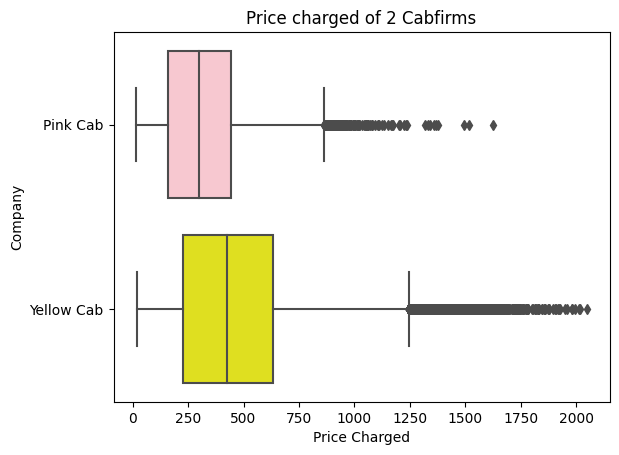

In [18]:
sns.boxplot(data=Cab, x='Price Charged', y='Company', palette=['pink','yellow']).set_title("Price charged of 2 Cabfirms")

Text(0.5, 1.0, 'Cost of trip of 2 Cabfirms')

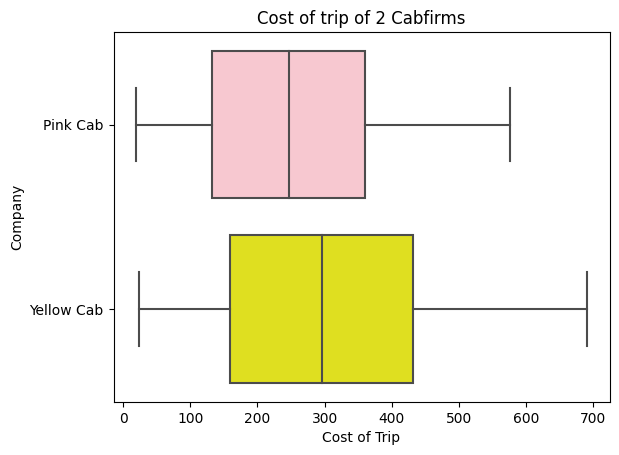

In [19]:
sns.boxplot(data=Cab, x='Cost of Trip', y='Company', palette=['pink','yellow']).set_title("Cost of trip of 2 Cabfirms")

Text(0.5, 1.0, 'Profit percentage of 2 companies')

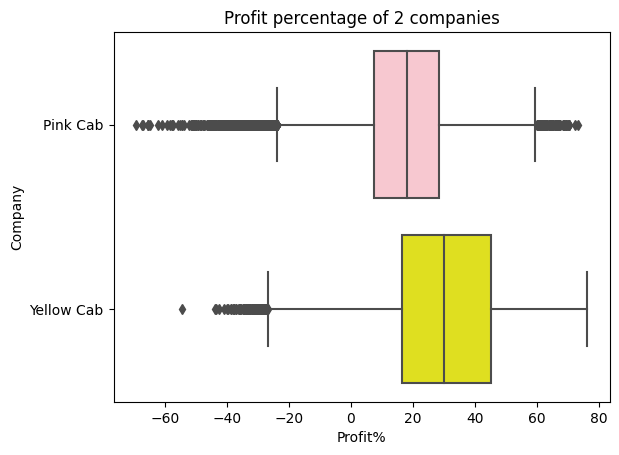

In [21]:
Cab["Profit%"] = (Cab['Price Charged']-Cab['Cost of Trip'])*100/Cab['Price Charged']
sns.boxplot(data=Cab, y="Company", x ="Profit%",palette=['pink','yellow']).set_title('Profit percentage of 2 companies')

Conclusion: Yellow Cab firm has higher profit in % than pink Cab firm.

Analysis 2

In [24]:
Gencomdata = Cab.merge(City, on='City').merge(Transid,on='Transaction ID').merge(Cusid,on='Customer ID')
Gencomdata.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit%,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,15.450869,"814,885","24,701",29290,Card,Male,28,10813
1,10351127,43302,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,46.981326,"814,885","24,701",29290,Cash,Male,28,10813
2,10412921,43427,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,24.575216,"814,885","24,701",29290,Card,Male,28,10813
3,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,6.601026,"814,885","24,701",27703,Card,Male,27,9237
4,10320494,43211,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,35.221301,"814,885","24,701",27703,Card,Male,27,9237


Text(0.5, 1.0, 'Age vs Companies')

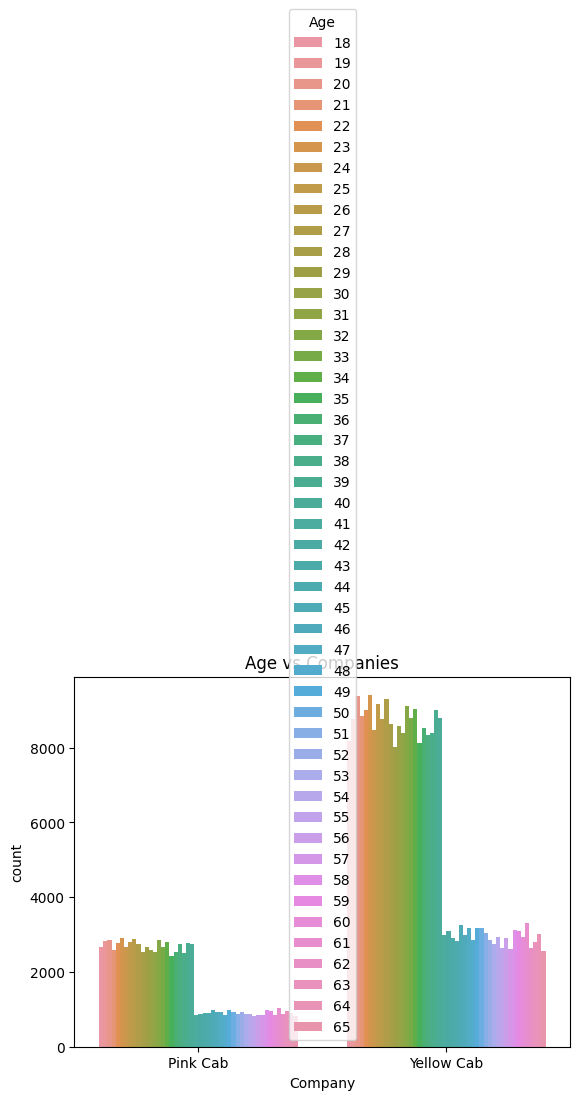

In [28]:
sns.countplot(data=Gencomdata,x='Company',hue='Age').set_title("Age vs Companies")

For Yellow Cab firm, there are more customers in every age periods.
And people under the ages of 45 were more than people over 45 in both 2 companies. 

Analysis 3

Text(0.5, 1.0, 'Gender vs Companies')

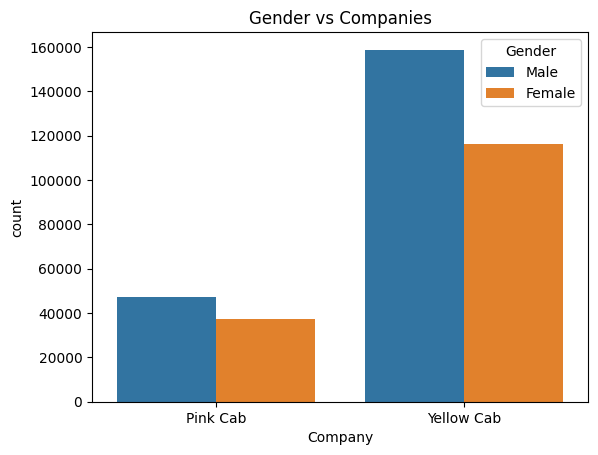

In [29]:
sns.countplot(data=Gencomdata,x='Company',hue='Gender').set_title("Gender vs Companies")

We have that the customer counts for yellow cab is more than pink cab,
and both in 2 firms, there were more male in counts.

Analysis 4

In [38]:
PinkCab=Gencomdata[Gencomdata['Company'] == 'Pink Cab']
YellowCab=Gencomdata[Gencomdata['Company'] == 'Yellow Cab']

#Calculate the Pink Cab firm counts
PinkCab_count=PinkCab['Payment_Mode'].value_counts()
PinkCab_percentage=PinkCab_count/PinkCab_count.sum()*100
#Calculate the Yellow Cab firm counts
YellowCab_count=YellowCab['Payment_Mode'].value_counts()
YellowCab_percentage=YellowCab_count/YellowCab_count.sum()*100

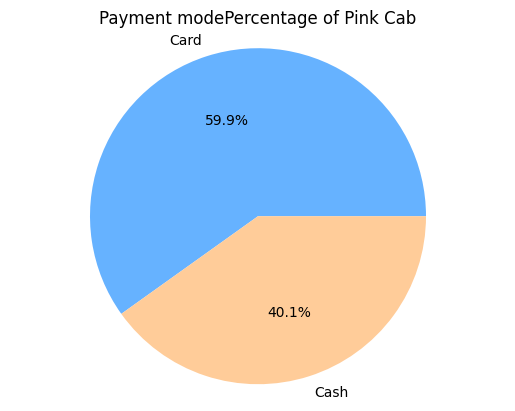

In [44]:
colors = ['#66B2FF','#FFCC99']
labels=PinkCab_percentage.index
size_PinkCab=PinkCab_percentage.values
plt.pie(size_PinkCab,labels=labels,autopct='%1.1f%%',colors=colors)
plt.title('Payment modePercentage of Pink Cab')
plt.axis('equal')
plt.show()

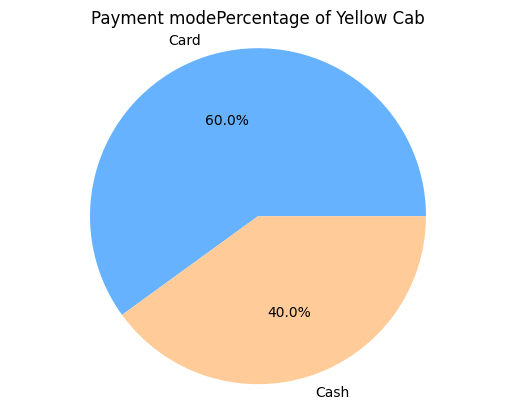

In [45]:
colors = ['#66B2FF','#FFCC99']
labels=YellowCab_percentage.index
size_YellowCab=YellowCab_percentage.values
plt.pie(size_YellowCab,labels=labels,autopct='%1.1f%%',colors=colors)
plt.title('Payment modePercentage of Yellow Cab')
plt.axis('equal')
plt.show()

There are more people willing to purchase in Card both in Pink Cab and Yellow Cab.

Analysis 5

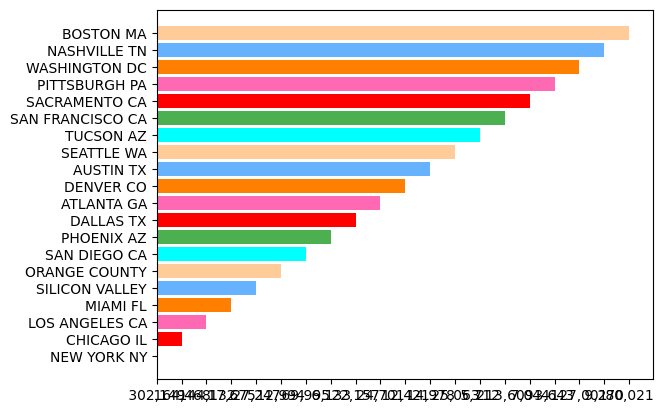

In [61]:
plt.barh(City['City'], City['Users'],  color = ["#4CAF50","red","hotpink","#FF7F00",'#66B2FF','#FFCC99','#00FFFF'])
plt.show()

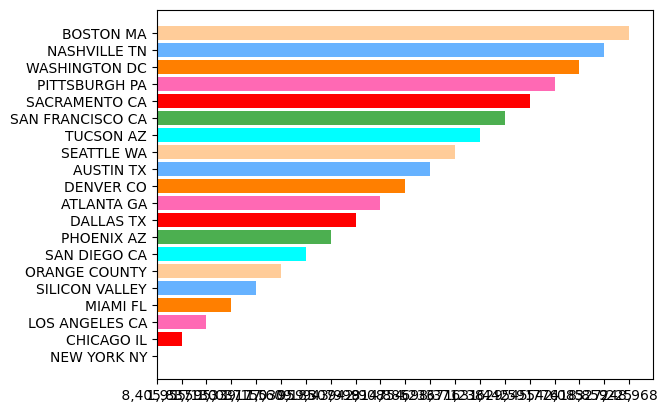

In [62]:
plt.barh(City['City'], City['Population'],  color = ["#4CAF50","red","hotpink","#FF7F00",'#66B2FF','#FFCC99','#00FFFF'])
plt.show()

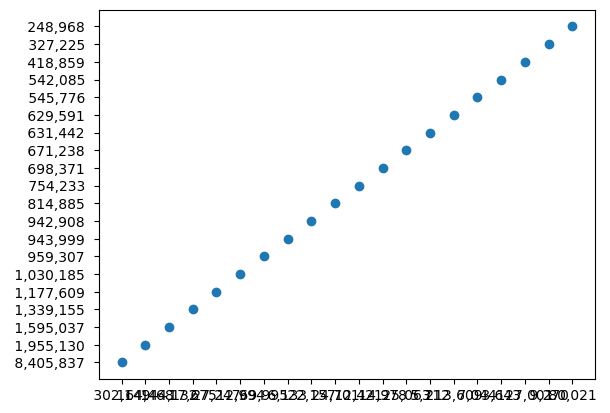

In [64]:
plt.scatter(City['Users'],City['Population'])
plt.show()

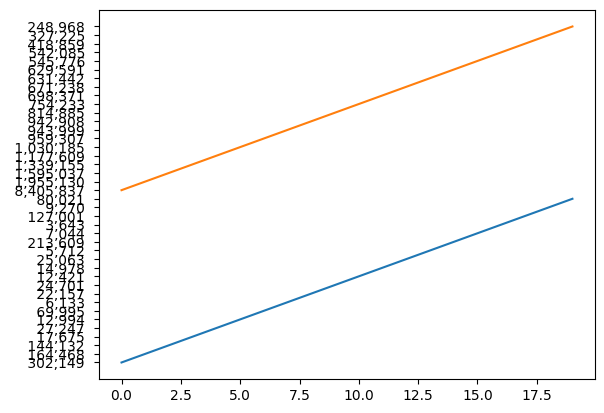

In [65]:
plt.plot(City['Users'])
plt.plot(City['Population'])

plt.show()

As the above pictures show, the users in the US cities is proportional to the population.
And Boston, Nashville are the top2 highest counts of users. Also the population are top2 high.